In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read The Dataset

In [21]:
import os
os.chdir('D:/DataSets/')

In [22]:
import pandas as pd
df = pd.read_csv('laptopPrice (1).csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Step 2: Data Quality Check

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [24]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [25]:
df.duplicated().sum()

21

### Drop The Duplicates

In [26]:
df.duplicated().sum()

21

### Cat & Con Seperation For Df

In [27]:
df.columns


Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [28]:
df.dtypes


brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [29]:
cat = list(df.columns[df.dtypes=='object'])
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [31]:
con = list(df.columns[df.dtypes!='object'])

In [32]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

### Perform Descriptive Analytics For Cat And  Con Features

In [33]:
df[cat].describe().T

,count,unique,top,freq
brand,823,8,ASUS,249
processor_brand,823,3,Intel,610
processor_name,823,11,Core i5,290
processor_gnrtn,823,8,11th,334
ram_gb,823,4,8 GB,418
ram_type,823,6,DDR4,709
ssd,823,7,512 GB,398
hdd,823,4,0 GB,621
os,823,3,Windows,779
os_bit,823,2,64-bit,714


In [34]:
df['brand'].value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

In [35]:
df['processor_brand'].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [36]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,823.0,76745.177400,45101.790525,16990.0,46095.0,64990.0,89636.0,441990.0
Number of Ratings,823.0,315.301337,1047.382654,0.0,0.0,17.0,139.5,15279.0
Number of Reviews,823.0,37.609964,121.728017,0.0,0.0,2.0,18.0,1947.0


### Perform Data Visualization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

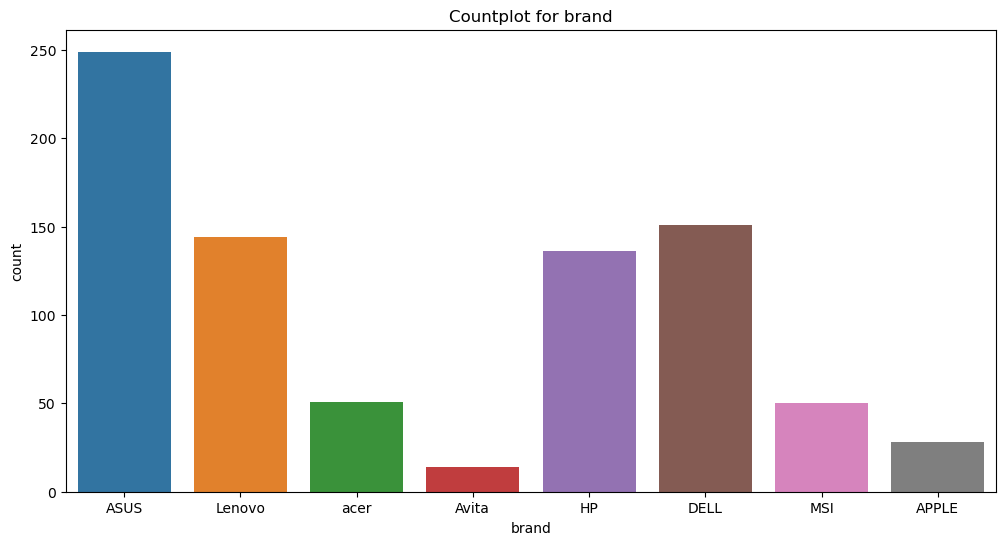

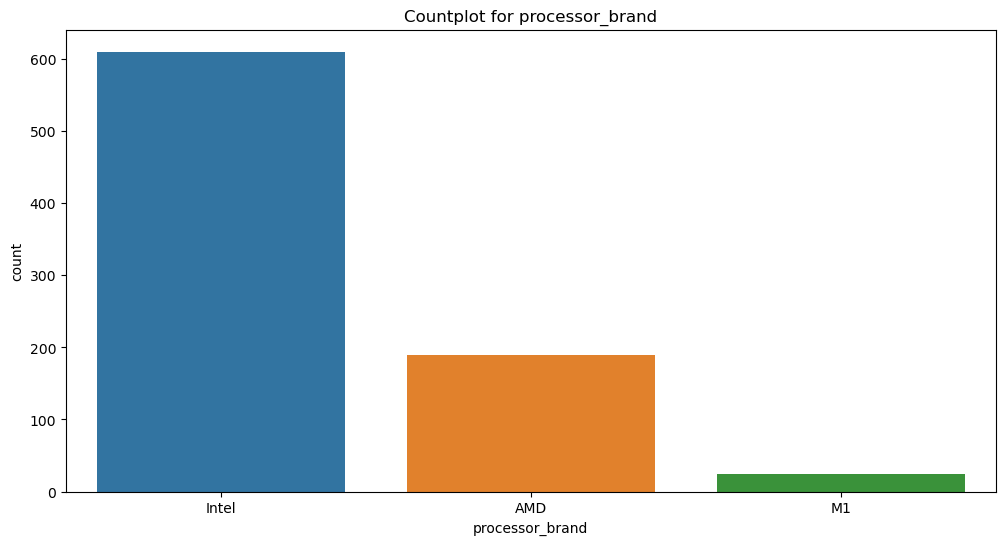

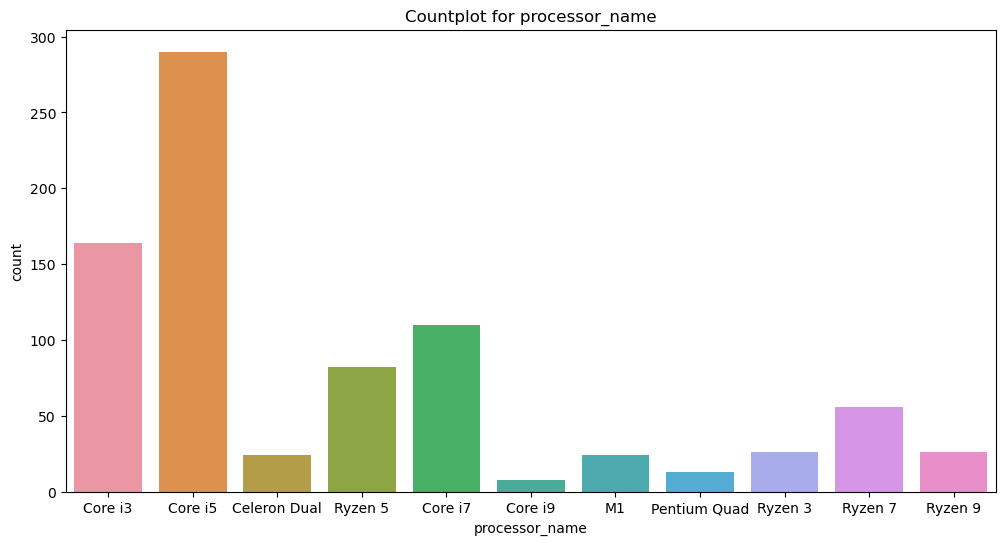

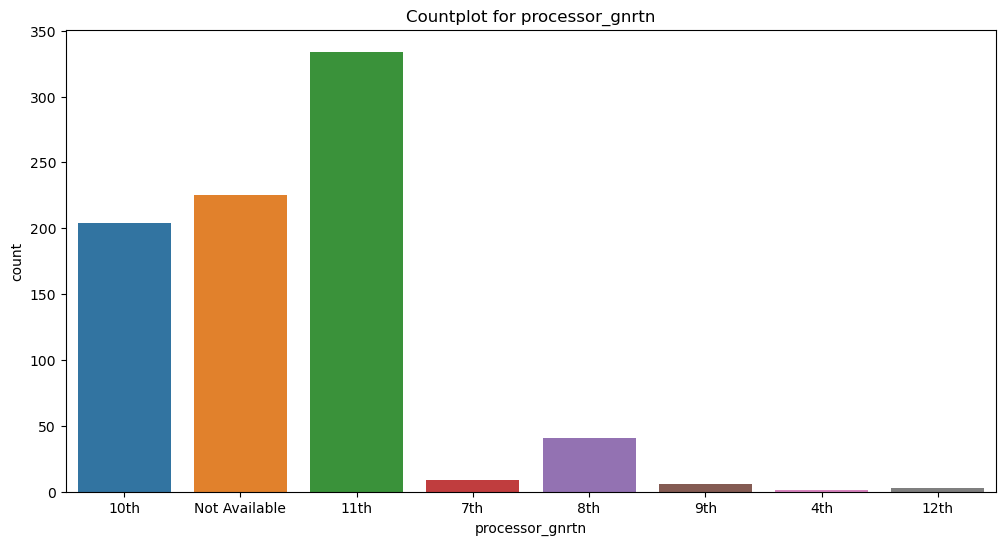

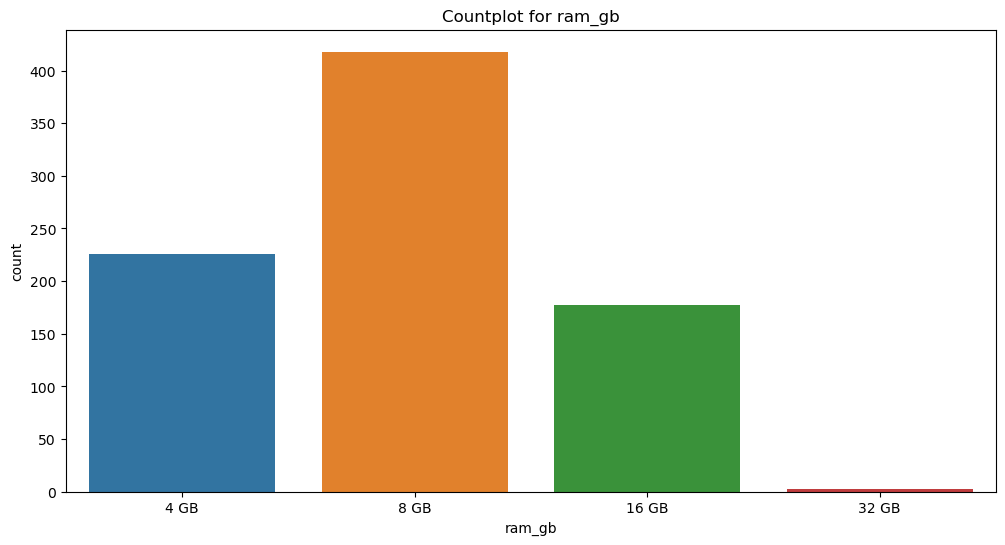

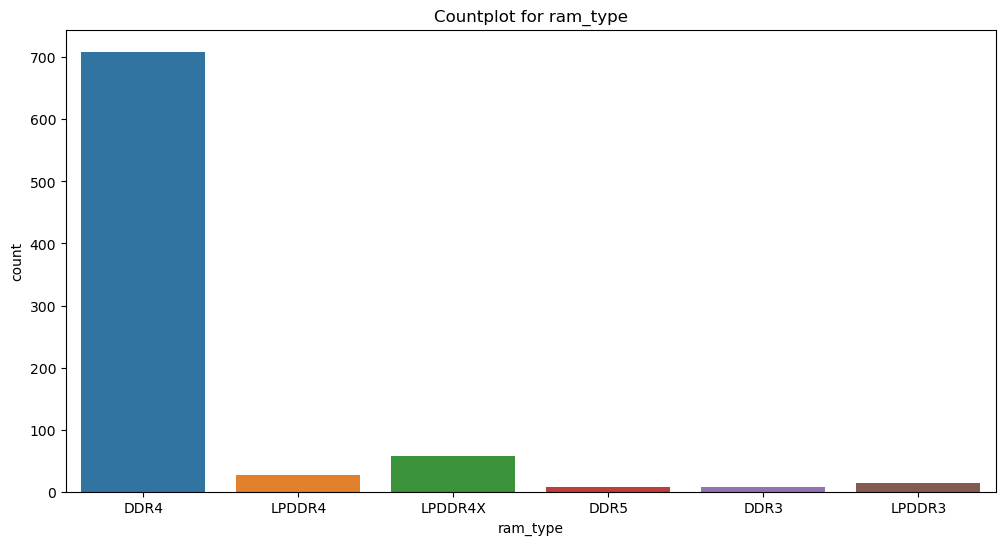

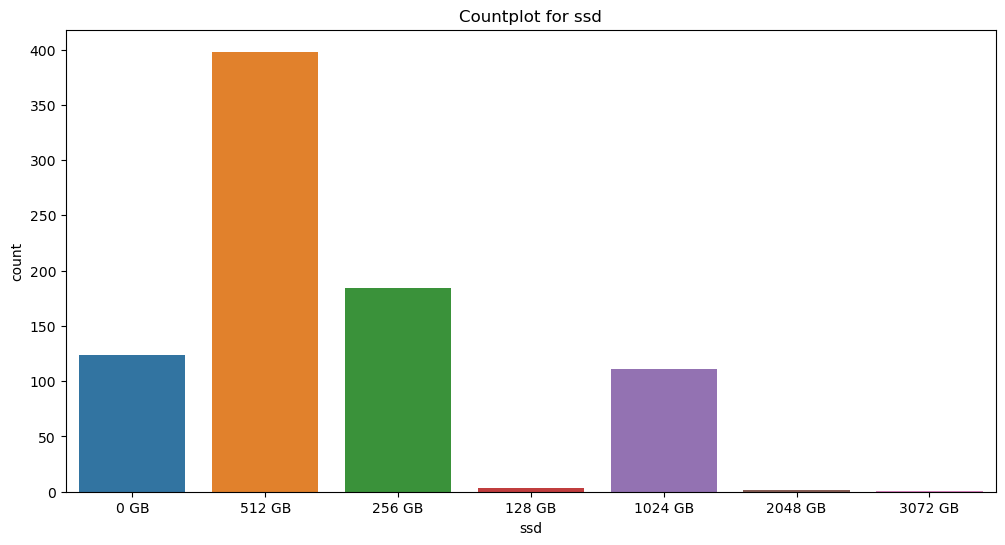

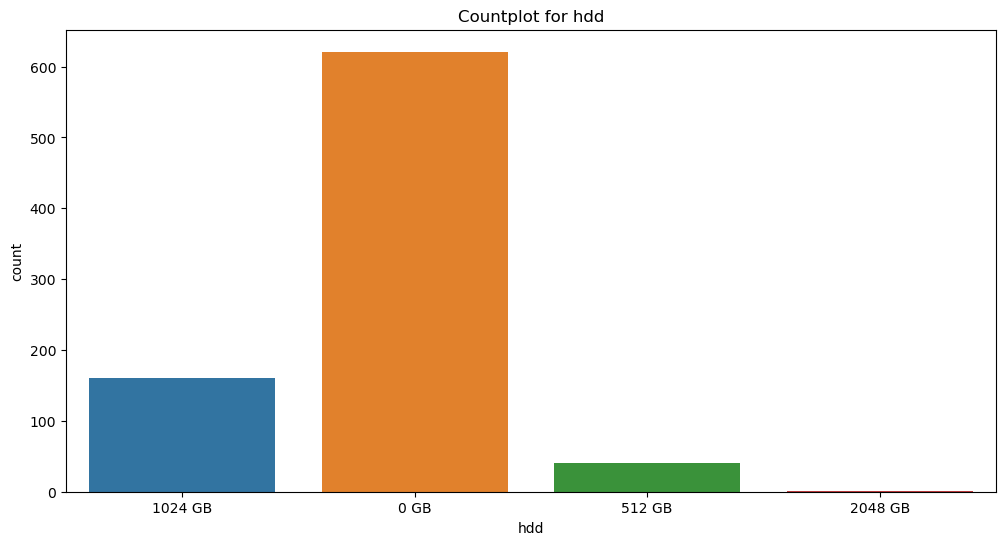

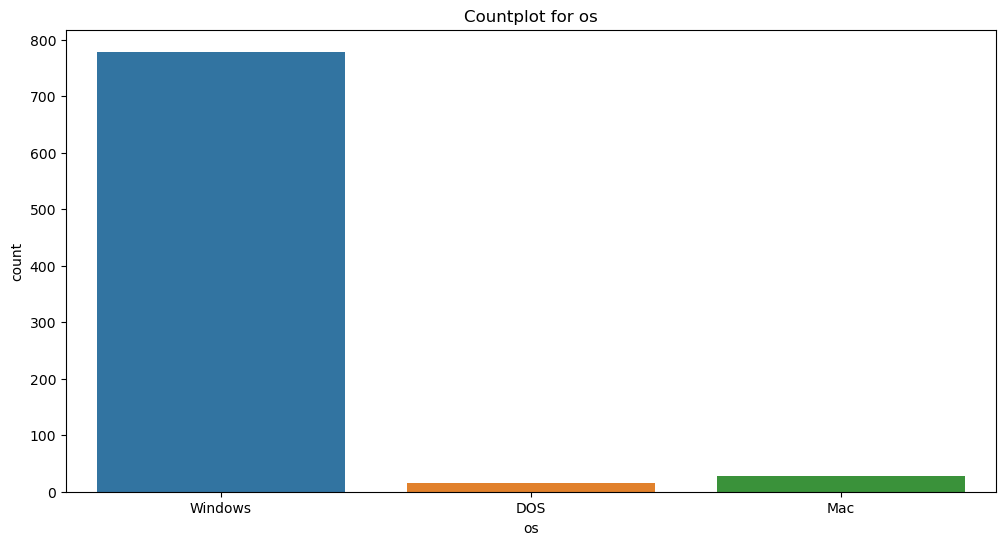

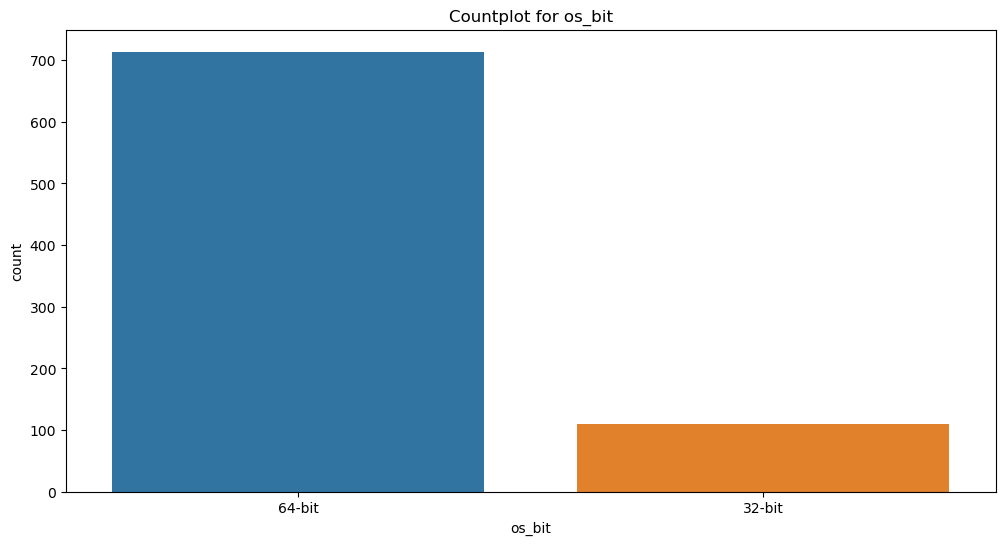

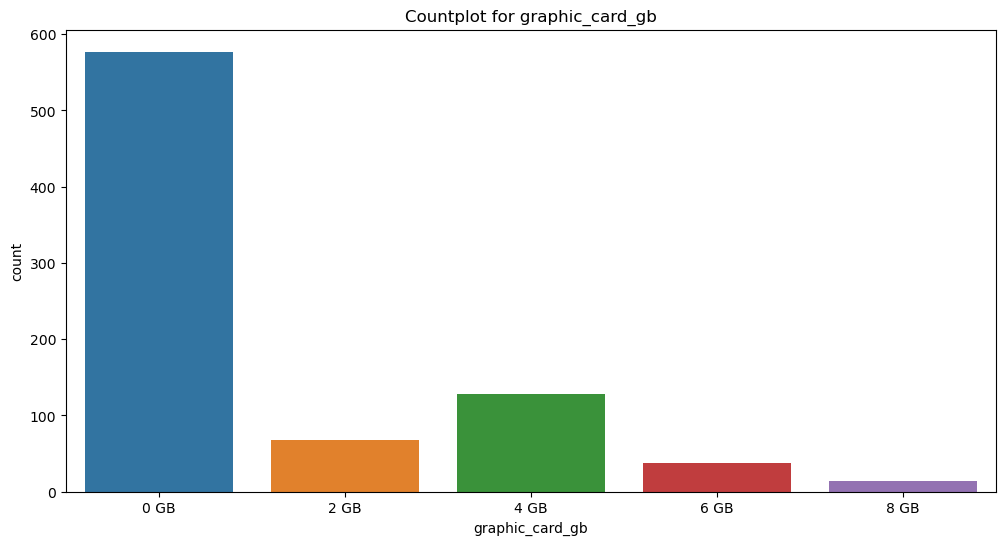

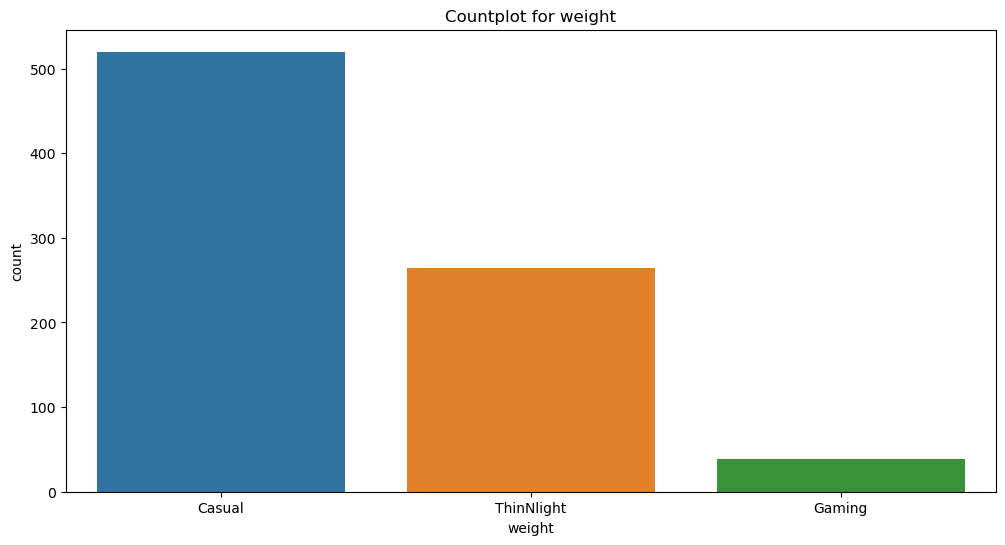

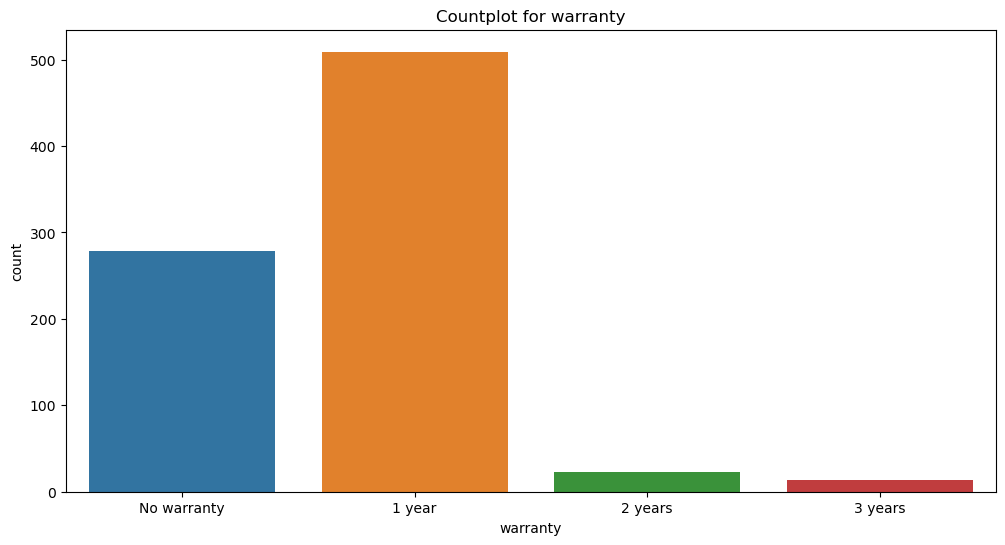

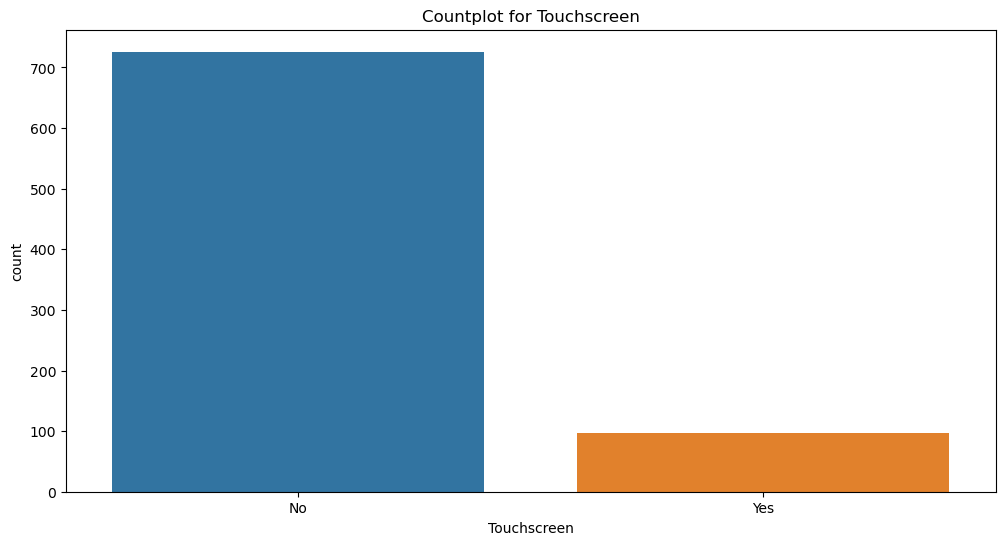

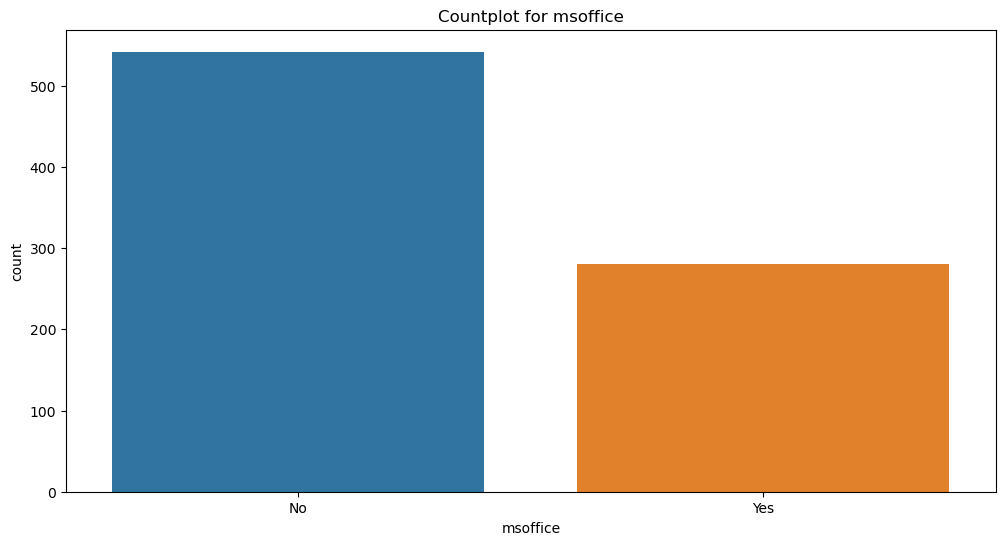

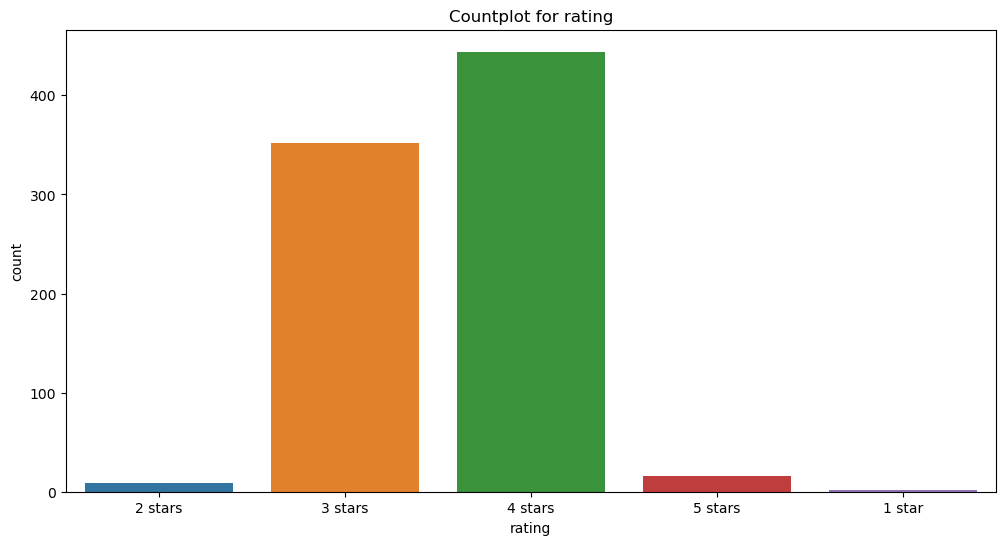

In [38]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot for {i}')
    plt.show()


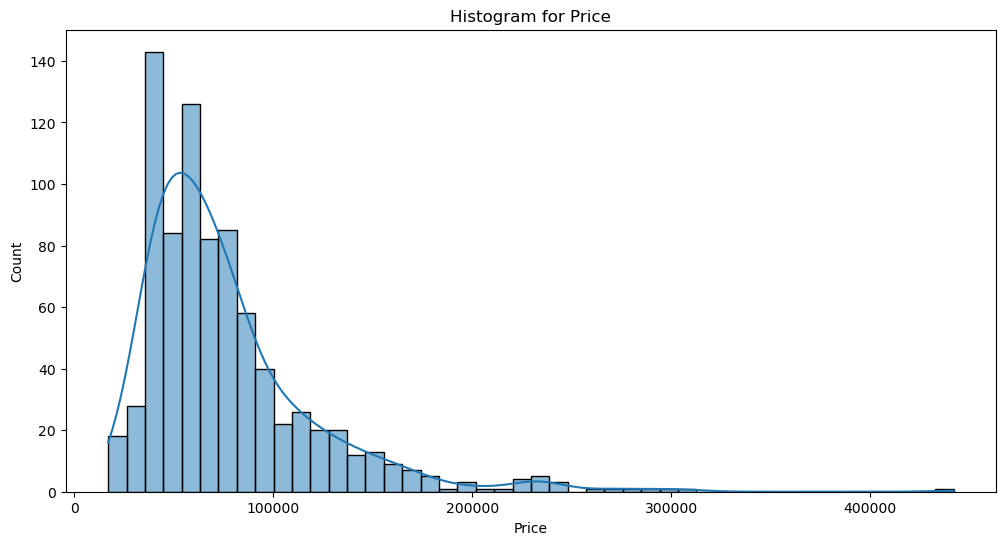

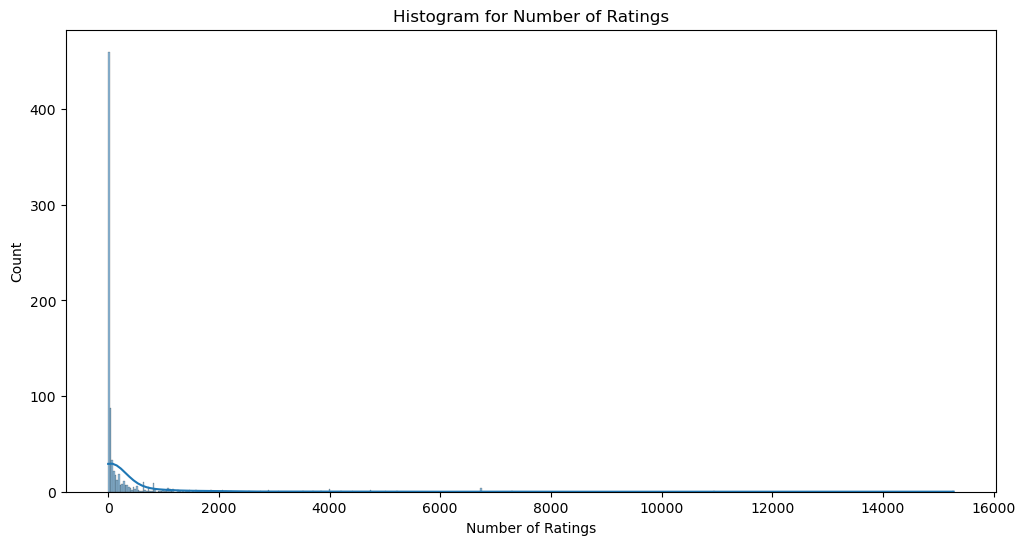

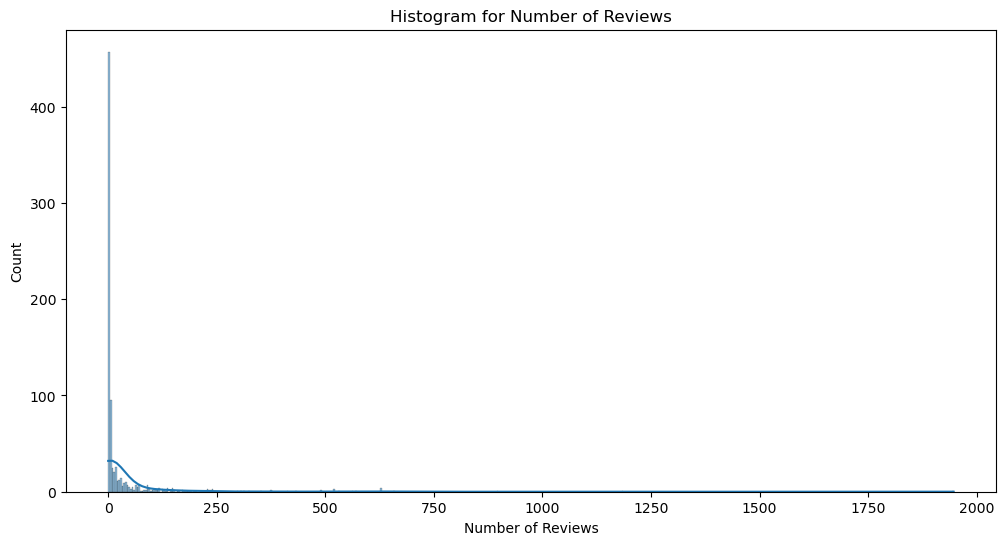

In [39]:
for i in con:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

## Multivariate Analysis


In [40]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

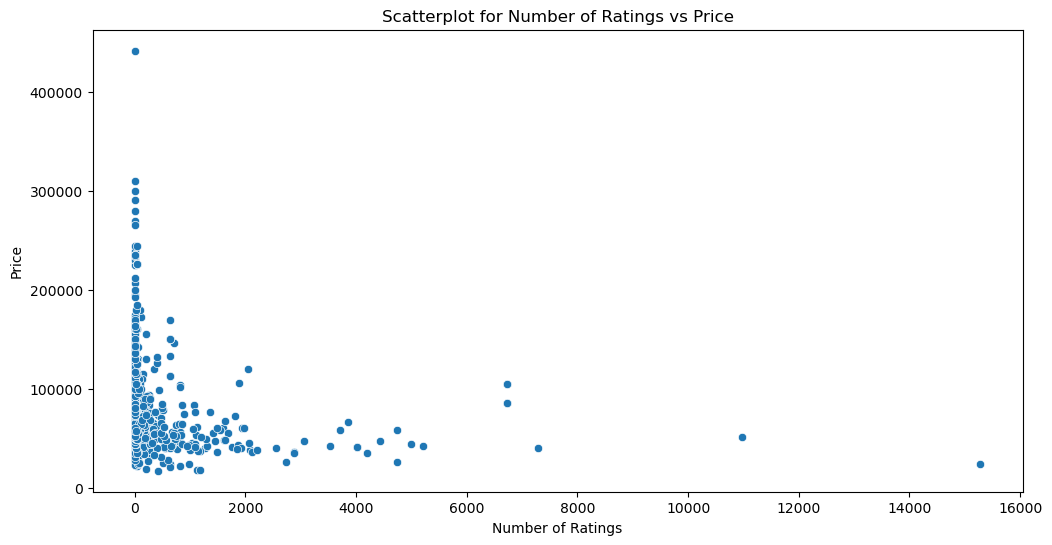

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Number of Ratings', y='Price')
plt.title(f'Scatterplot for Number of Ratings vs Price')
plt.show()


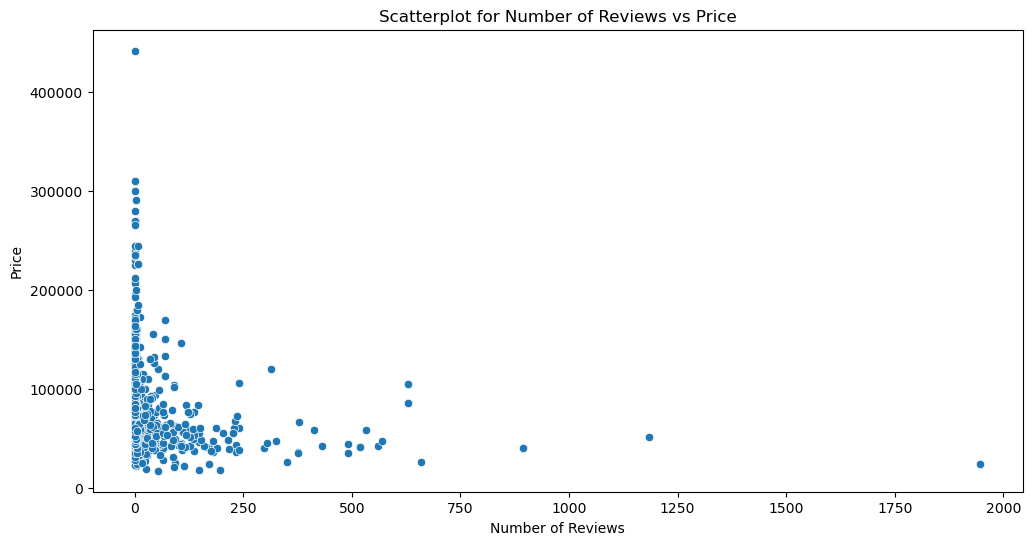

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Number of Reviews', y='Price')
plt.title(f'Scatterplot for Number of Reviews vs Price')
plt.show()

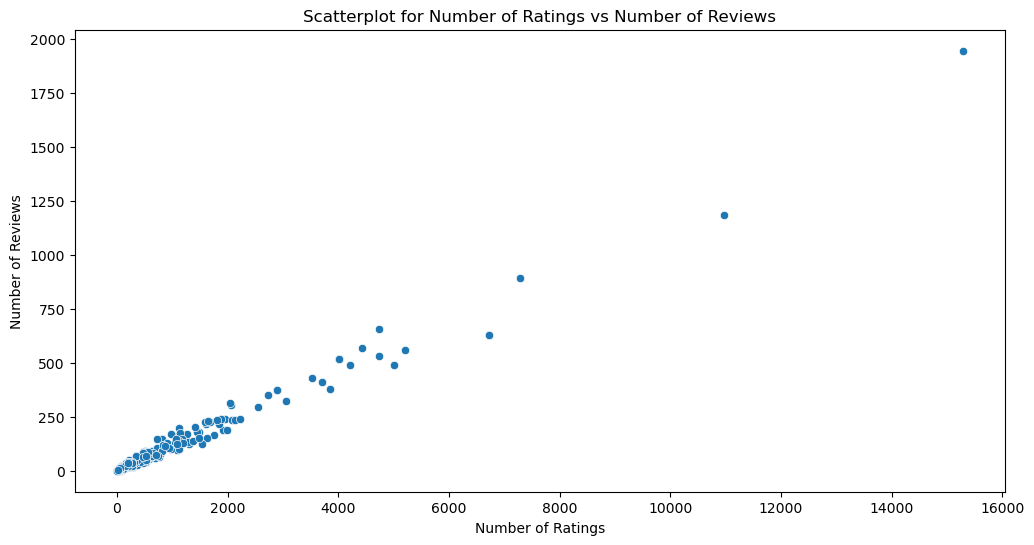

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Number of Ratings', y='Number of Reviews')
plt.title(f'Scatterplot for Number of Ratings vs Number of Reviews')
plt.show()

### Number Of Ratings And Number Of Reviews Are Linearly Dependent On Each Other

### Correlation Plot 

In [44]:
cor = df[con].corr()
cor

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.140392,-0.148738
Number of Ratings,-0.140392,1.000000,0.989626
Number of Reviews,-0.148738,0.989626,1.000000


<Axes: >

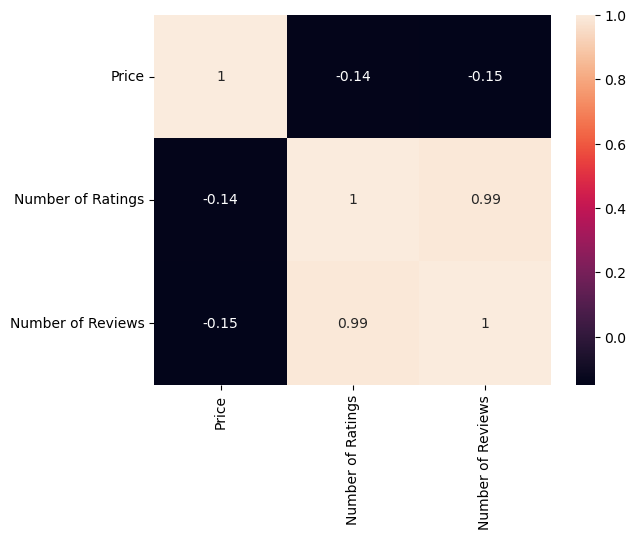

In [46]:
sns.heatmap(cor, annot=True)


### Cat Vs Con - Boxplot 

In [47]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [48]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

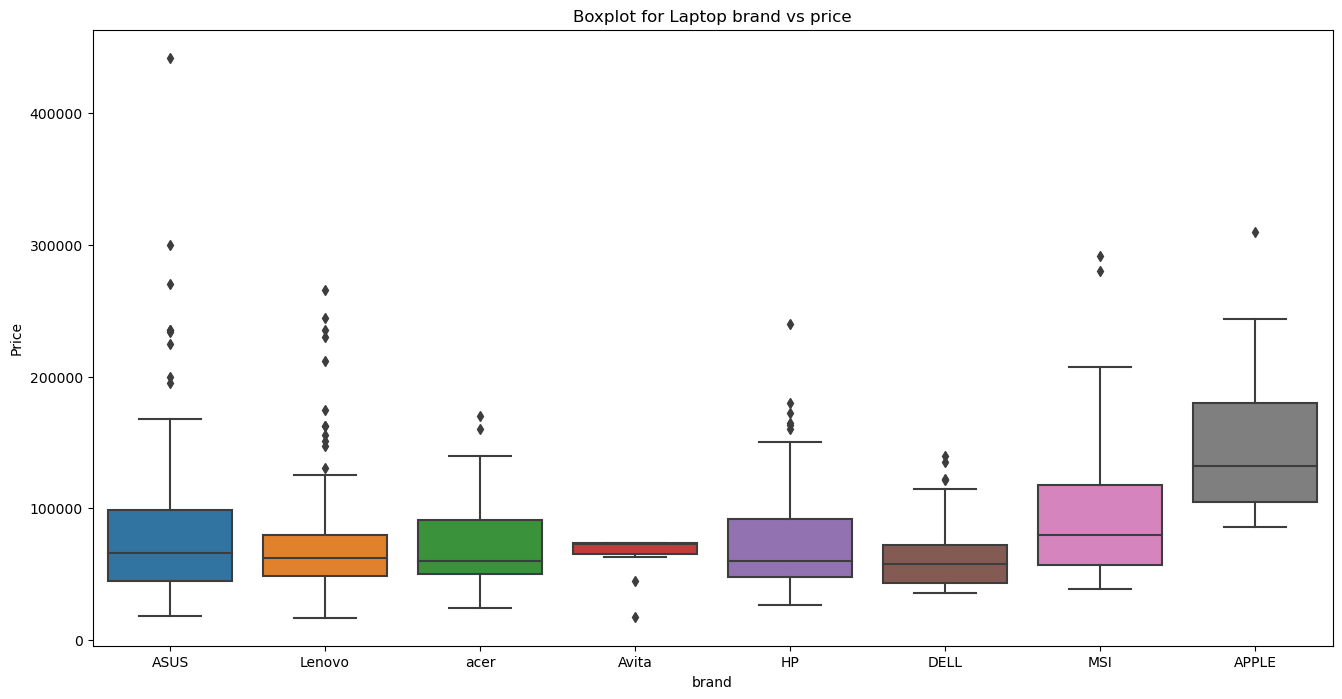

In [49]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='brand', y='Price')
plt.title('Boxplot for Laptop brand vs price')
plt.show()

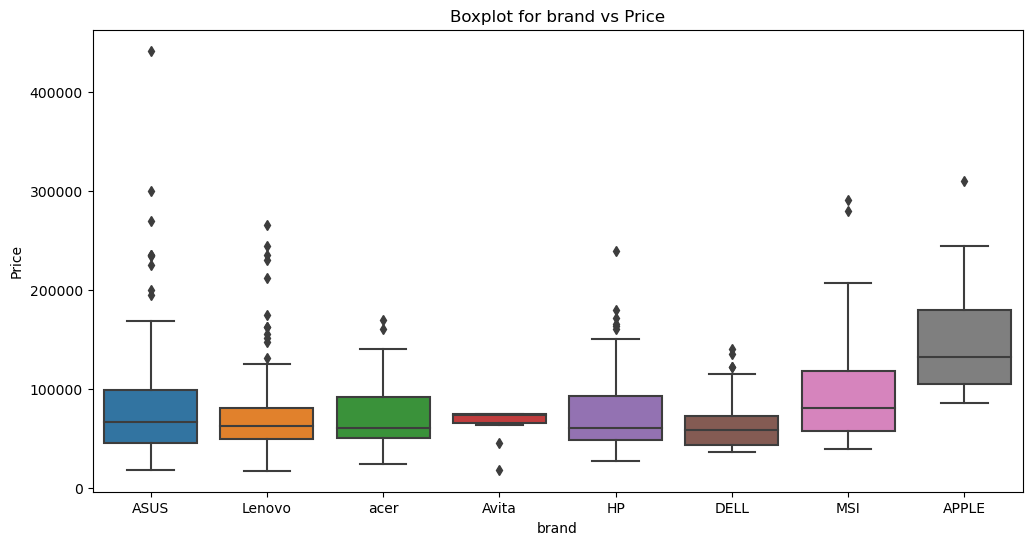

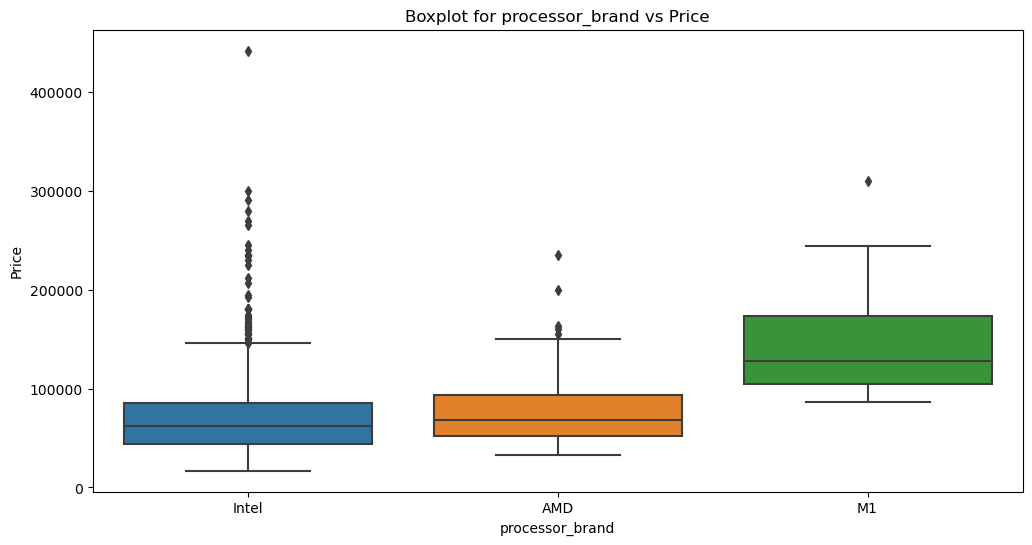

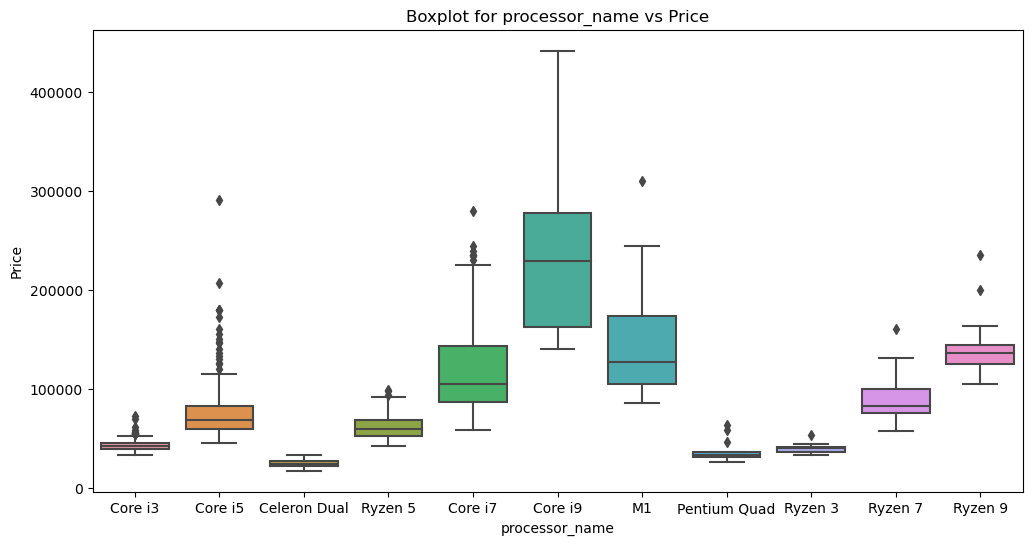

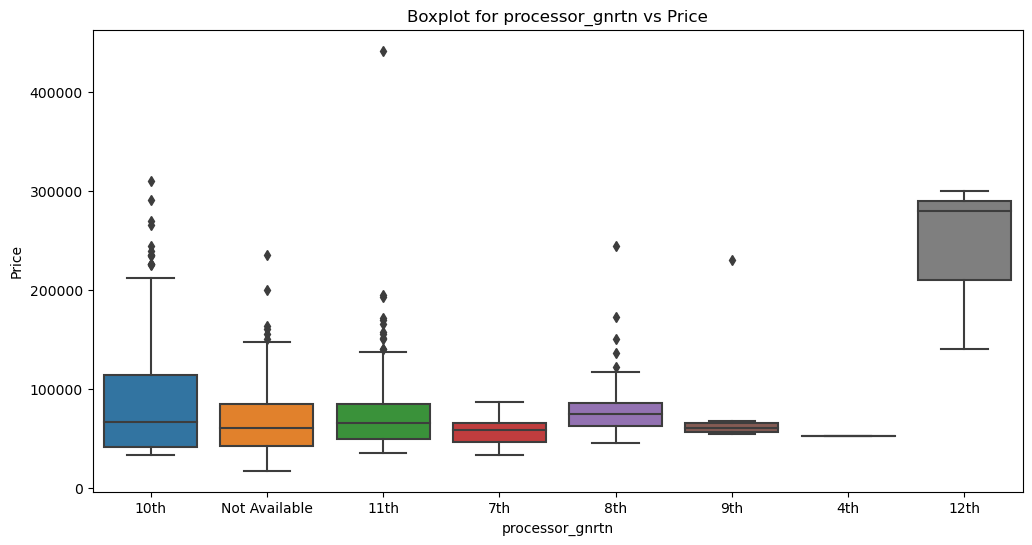

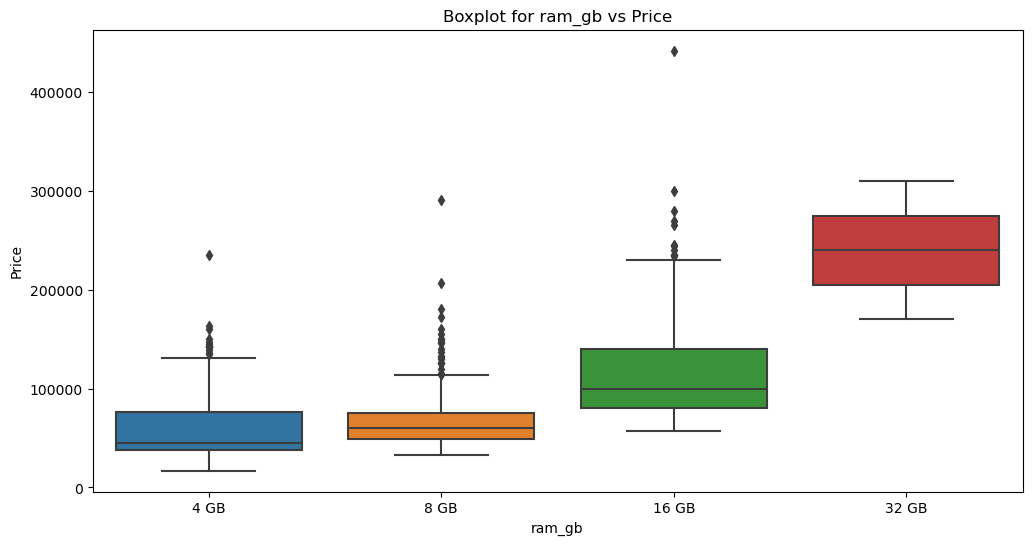

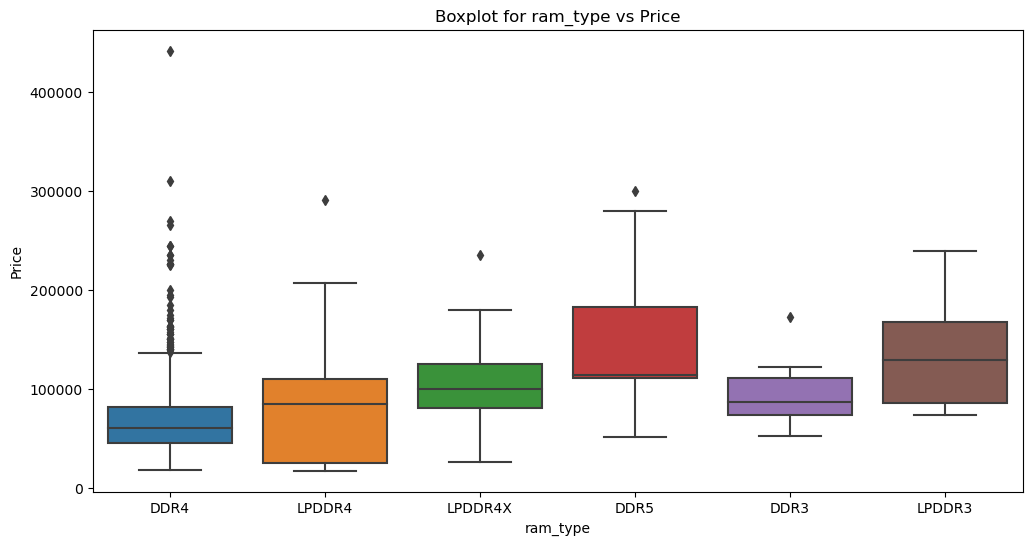

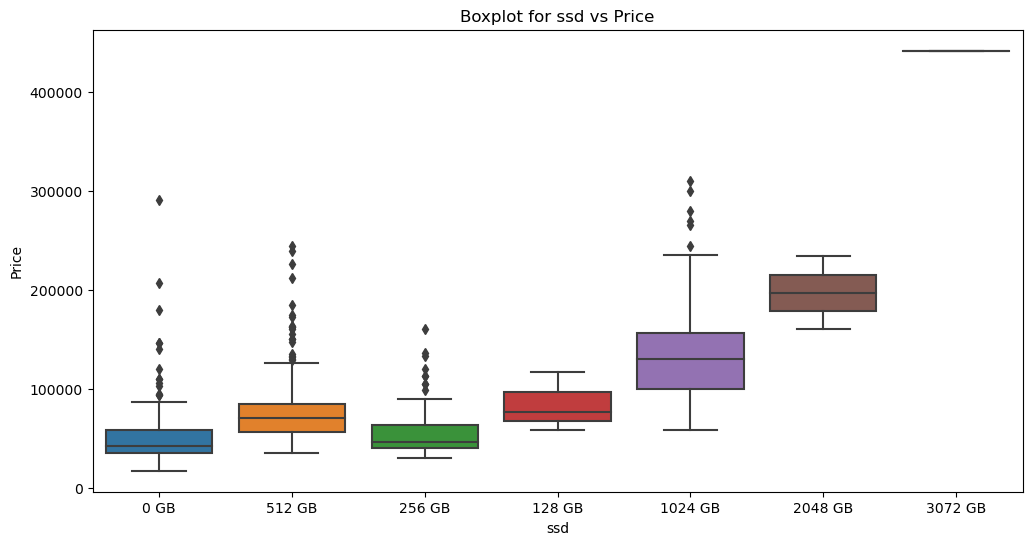

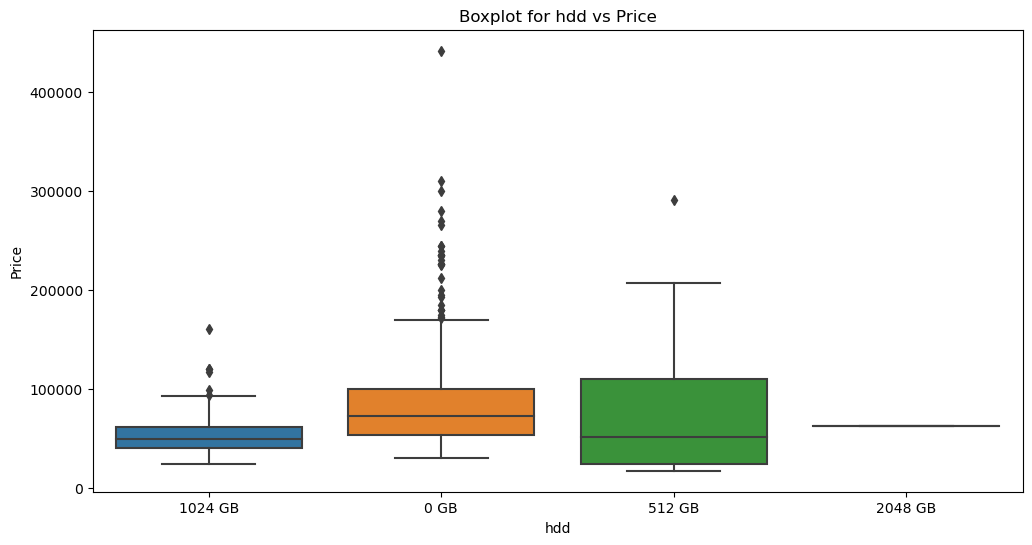

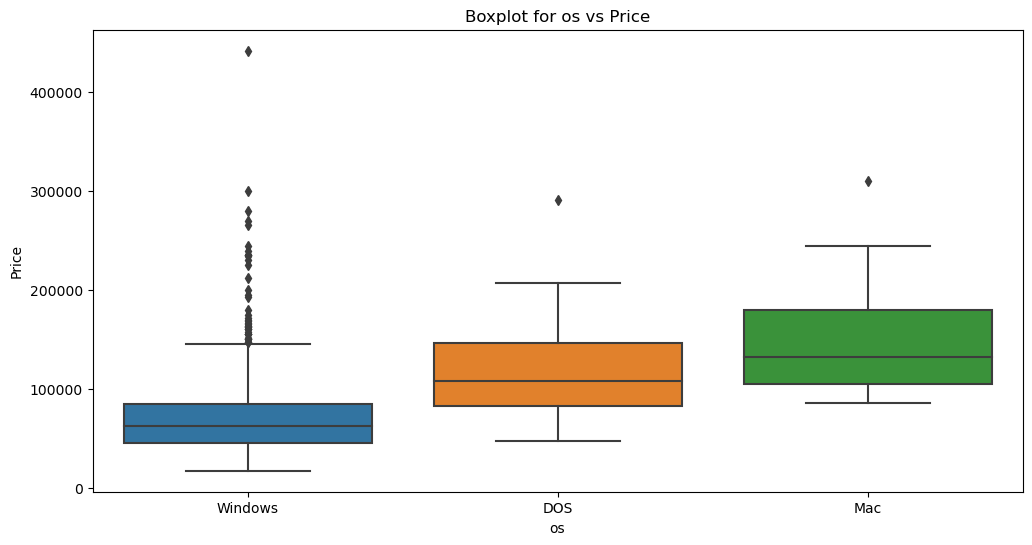

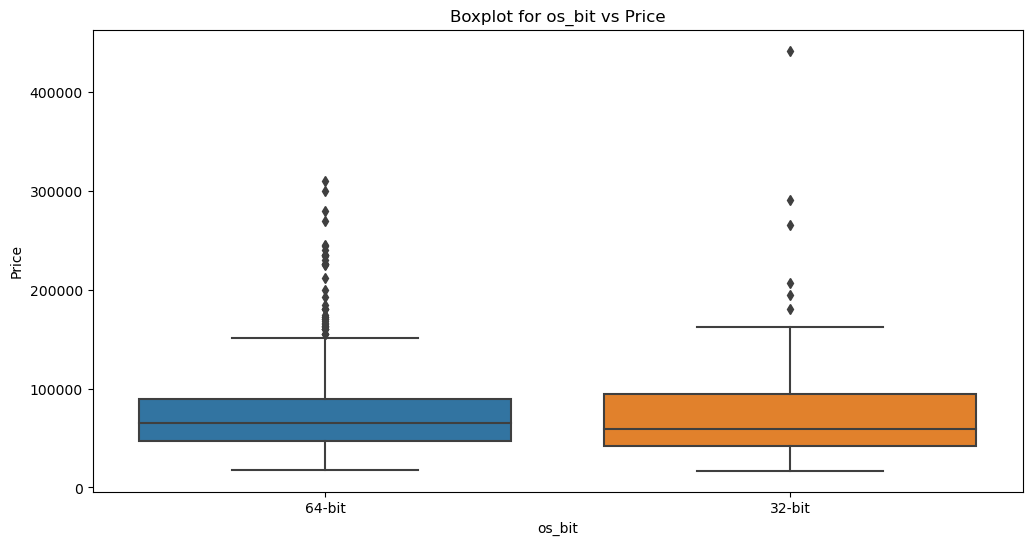

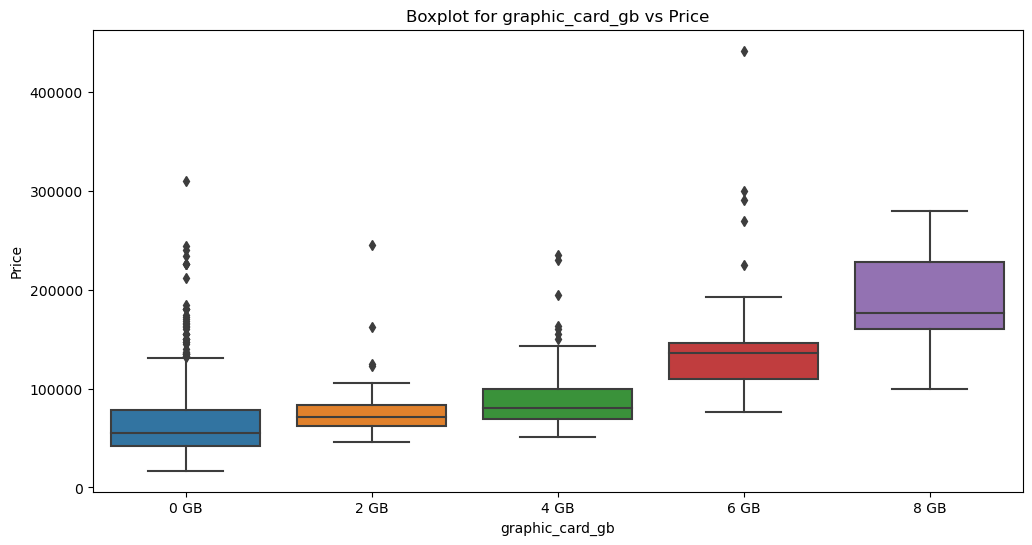

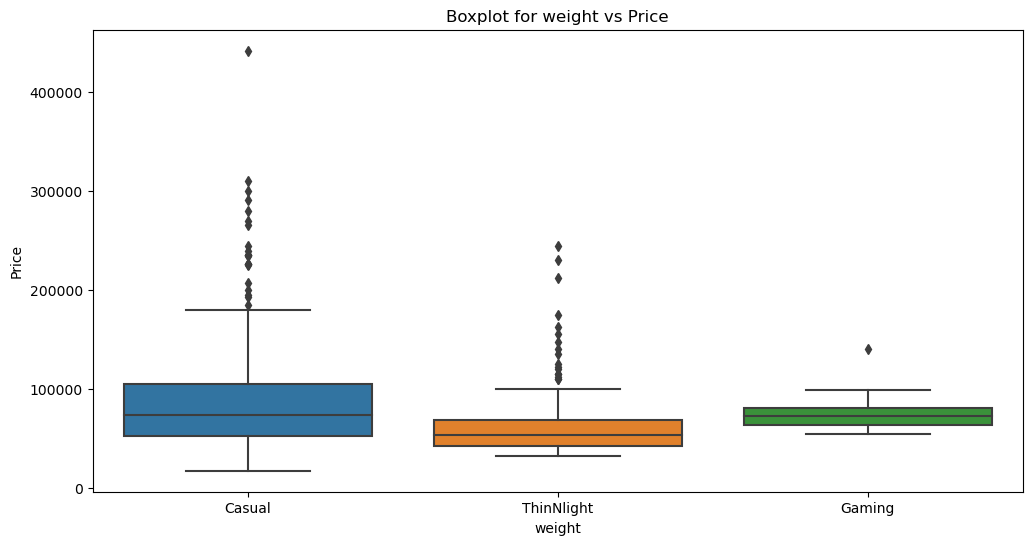

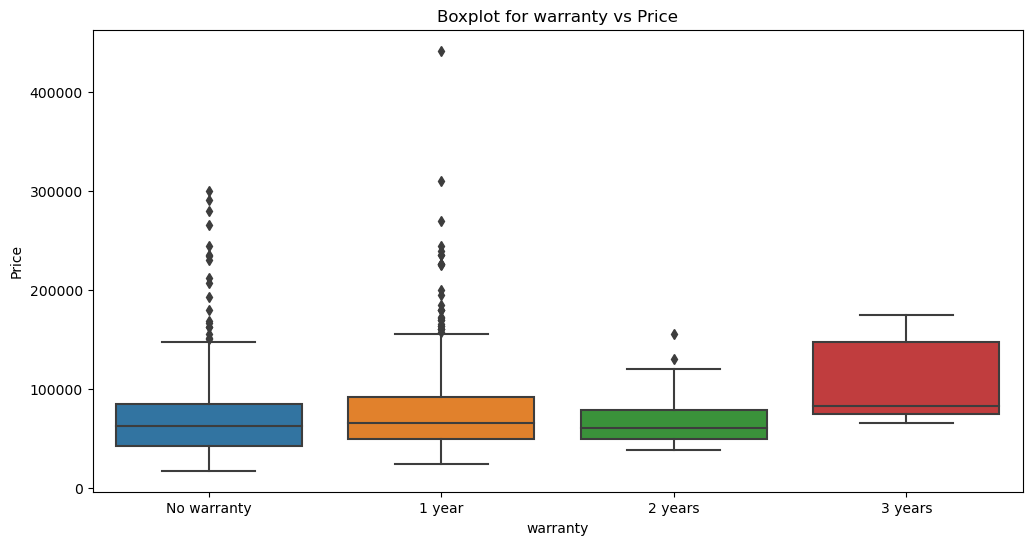

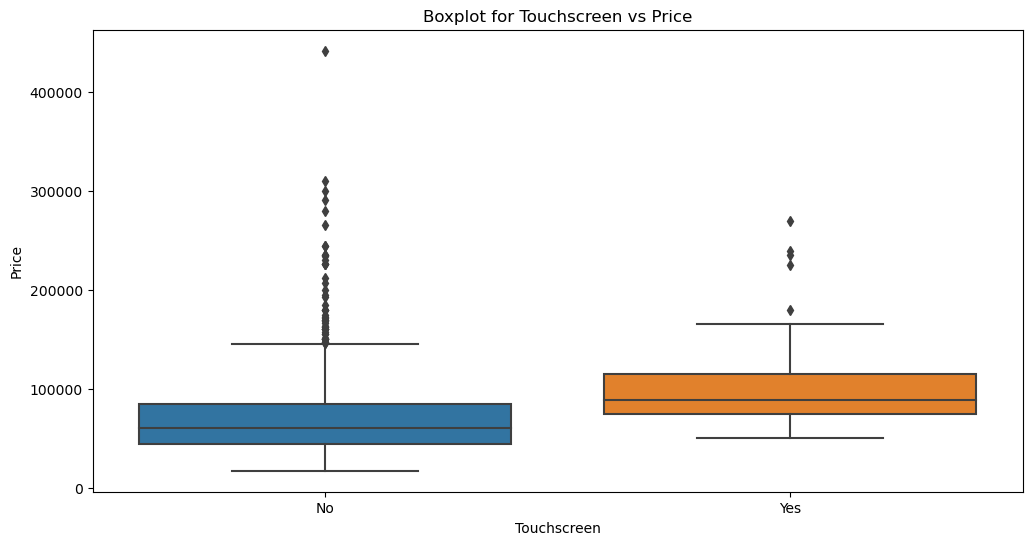

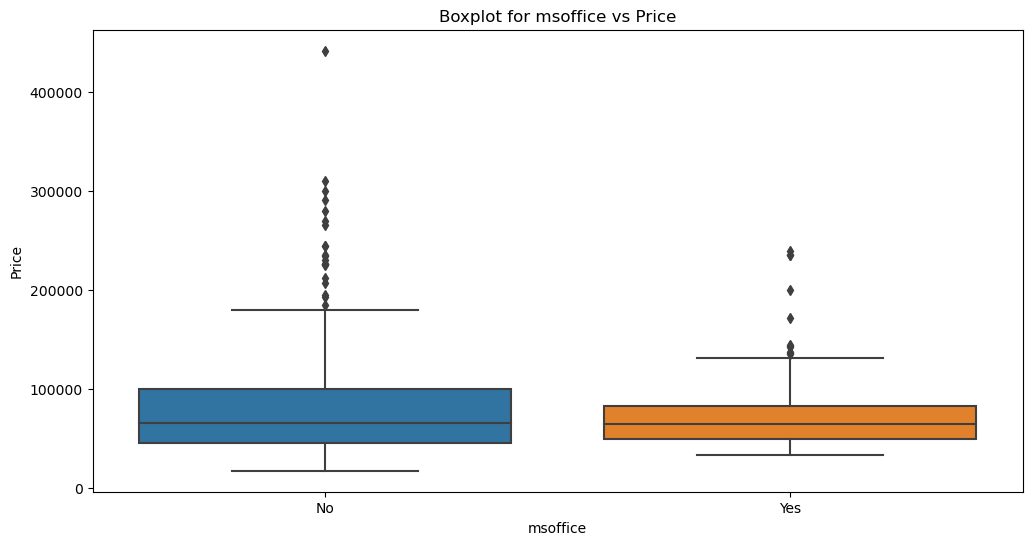

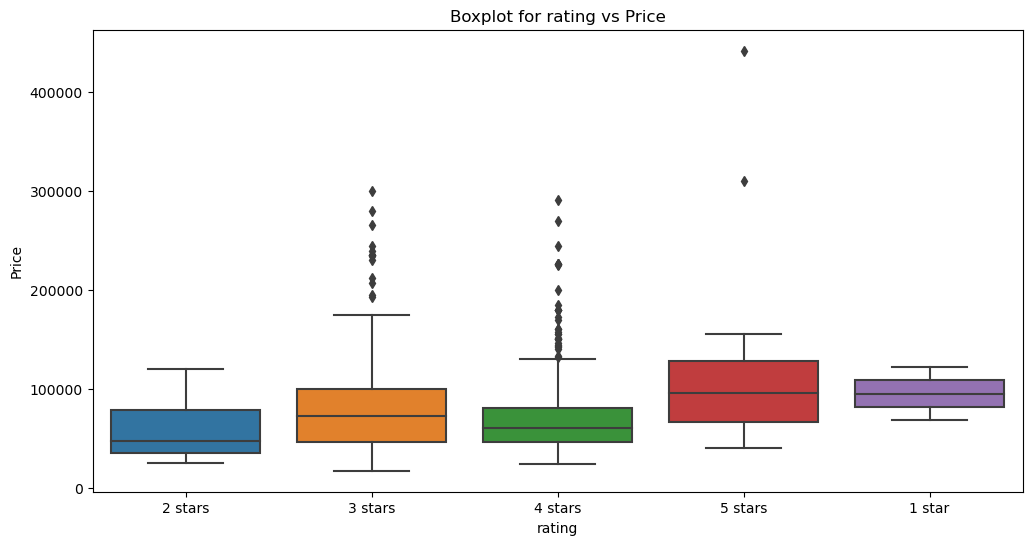

In [50]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=i, y='Price')
    plt.title(f'Boxplot for {i} vs Price')
    plt.show()

## Cateogical vs Categorical - Crosstab Heatmap

In [51]:
cat


['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [52]:
ctab1 = pd.crosstab(df['processor_brand'], df['processor_gnrtn'])
ctab1

processor_gnrtn,10th,11th,12th,4th,7th,8th,9th,Not Available
processor_brand,,,,,,,,
AMD,4,0,0,0,0,0,0,185
Intel,176,334,3,1,9,41,6,40
M1,24,0,0,0,0,0,0,0


<Axes: xlabel='processor_gnrtn', ylabel='processor_brand'>

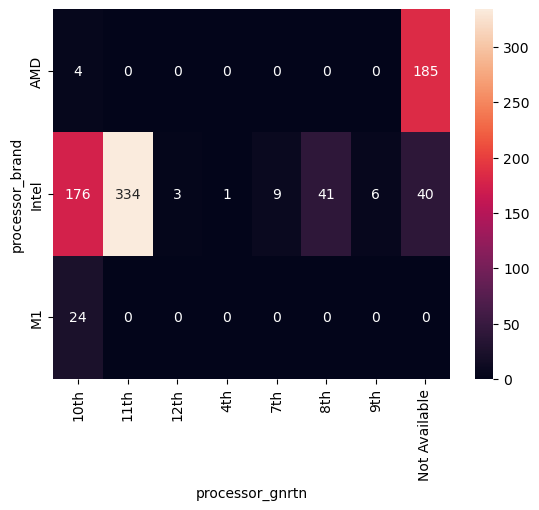

In [53]:
sns.heatmap(ctab1, annot=True, fmt='d')

In [54]:
ctab2 = pd.crosstab(df['brand'], df['rating'])
ctab2

rating,1 star,2 stars,3 stars,4 stars,5 stars
brand,,,,,
APPLE,0,0,0,27,1
ASUS,0,3,119,119,8
Avita,0,0,14,0,0
DELL,2,2,70,75,2
HP,0,1,44,88,3
Lenovo,0,3,67,72,2
MSI,0,0,16,34,0
acer,0,0,22,29,0


<Axes: xlabel='rating', ylabel='brand'>

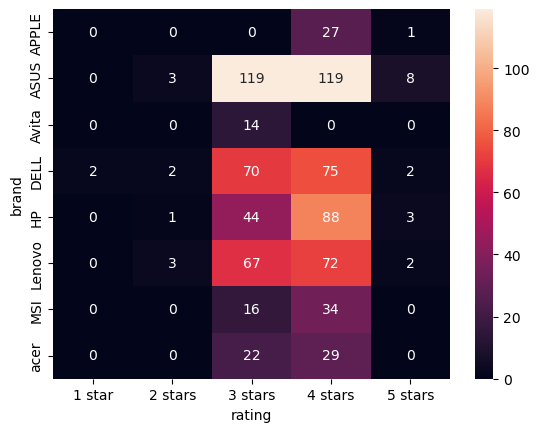

In [55]:
sns.heatmap(ctab2, annot=True, fmt='d')

In [56]:
ctab3 = pd.crosstab(df['ram_gb'], df['ram_type'])
ctab3


ram_type,DDR3,DDR4,DDR5,LPDDR3,LPDDR4,LPDDR4X
ram_gb,,,,,,
16 GB,2,144,2,8,1,20
32 GB,0,2,0,0,0,0
4 GB,0,200,4,0,10,12
8 GB,5,363,2,6,16,26


<Axes: xlabel='ram_type', ylabel='ram_gb'>

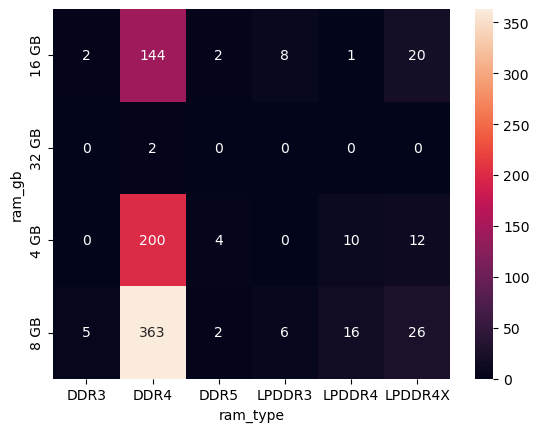

In [57]:
sns.heatmap(ctab3, annot=True, fmt='d')

### Multivarite analysis - Pairplot

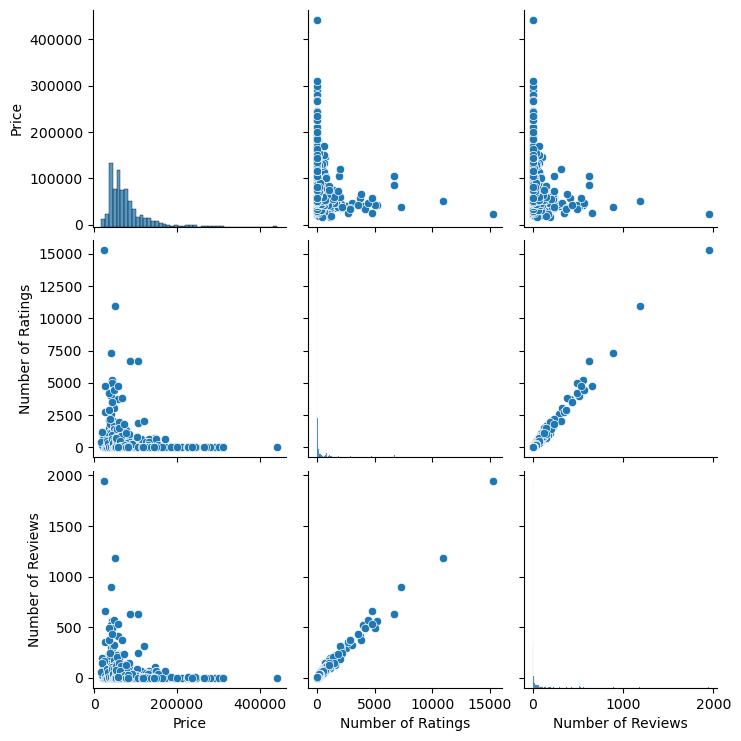

In [58]:
sns.pairplot(data=df)

In [59]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

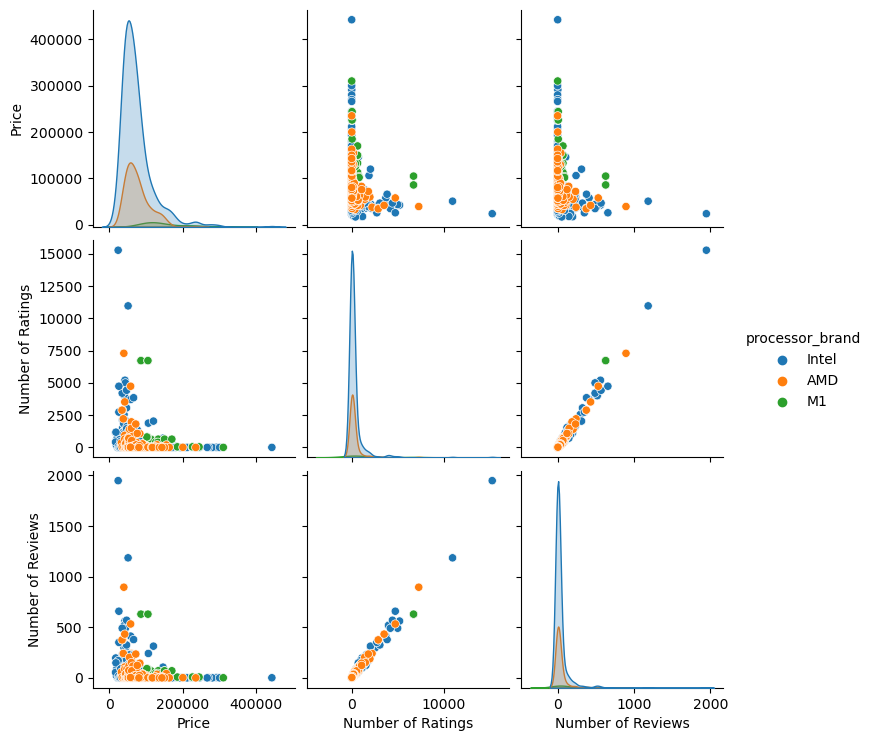

In [60]:
sns.pairplot(data=df, hue='processor_brand')

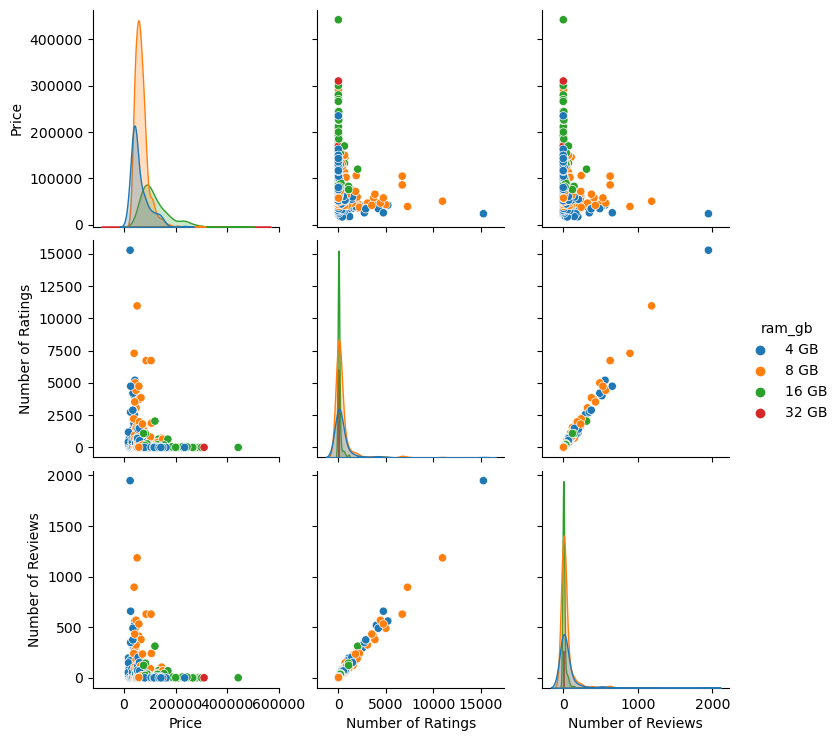

In [61]:
sns.pairplot(data=df, hue='ram_gb')